# How to actually build a neural network from blocks?

The webinar is a part of the [Intel Software Student Developer Program for AI](https://software.intel.com/en-us/experts/ambassadors).

## Webinar

* sign up: https://www.crowdcast.io/e/neural-network-blocks/register (6 July 2017)
* speaker: Jakub Czakon, moderator: Dr. Piotr Migdał

## Installation

* Python 3 with Jupyter Notebook and respective libraries (the easiest way is with [Anaconda distribution](https://www.continuum.io/downloads)).
* [Keras](https://keras.io/) (2.x) with [TensorFlow](https://www.tensorflow.org/) backend.
* [keras-sequential-ascii](https://github.com/stared/keras-sequential-ascii) for diagrams

```bash
$ pip install tensorflow
$ pip install keras
$ pip install git+git://github.com/stared/keras-sequential-ascii.git
$ wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
```

## Data

Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.

## More info

For additional information, including [some context for notMNIST](http://p.migdal.pl/2017/04/30/teaching-deep-learning.html#notmnist), see [Learning Deep Learning with Keras](http://p.migdal.pl/2017/04/30/teaching-deep-learning.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from scipy import io
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras_sequential_ascii import sequential_model_to_ascii_printout
from live_loss_plot import PlotLosses

# Keras layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPool2D

Using TensorFlow backend.


In [2]:
# load data
data = io.loadmat("../resources/notMNIST_small.mat")

# transform data
X = data['images']
y = data['labels']
resolution = 28
classes = 10

X = np.transpose(X, (2, 0, 1))

y = y.astype('int32')
X = X.astype('float32') / 255.

# channel for X
X = X.reshape((-1, resolution, resolution, 1))

# 3 -> [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
Y = np_utils.to_categorical(y, 10)

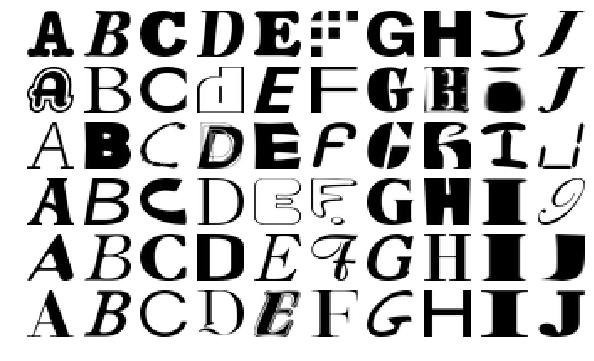

In [3]:
# random letters
rows = 6
fig, axs = plt.subplots(rows, classes, figsize=(classes, rows))
for letter_id in range(10):
    letters = X[y == letter_id]
    for i in range(rows):
        ax = axs[i, letter_id]
        ax.imshow(letters[np.random.randint(len(letters)),:,:,0],
                  cmap='Greys', interpolation='none')
        ax.axis('off')

In [4]:
# splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=137)

In [5]:
plot_losses = PlotLosses(figsize=(8, 4))

In [ ]:
# here we define model
model = Sequential()

model.add(Flatten(input_shape=(resolution, resolution, 1)))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

sequential_model_to_ascii_printout(model)

In [ ]:
# train model
model.fit(X_train, Y_train,
          epochs=1,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

In [ ]:
# example predictions
predictions = model.predict(X_test)

rows = 5
fig, axs = plt.subplots(rows, 2, figsize=(8, 1.5 * rows))
for i in range(rows):
    ax = axs[i,0]
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx,:,:,0],
              cmap='Greys', interpolation='none')
    ax.axis('off')
        
    pd.Series(predictions[idx], index=list("ABCDEFGHIJ")).plot('bar', ax=axs[i,1], ylim=[0,1])

plt.tight_layout()

# Bonus: Grid Plots

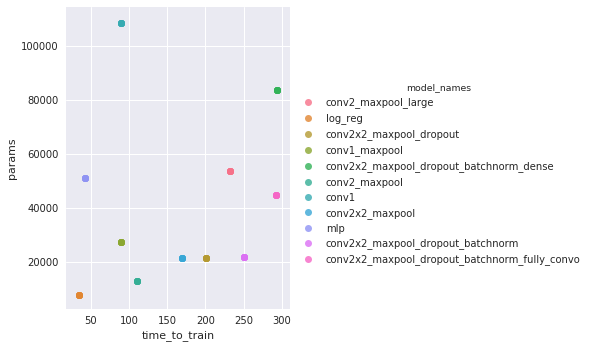

In [7]:
from grid_plot import plot_complexity, plot_grid
plot_complexity(save='../resources/model_grid_scores.csv');

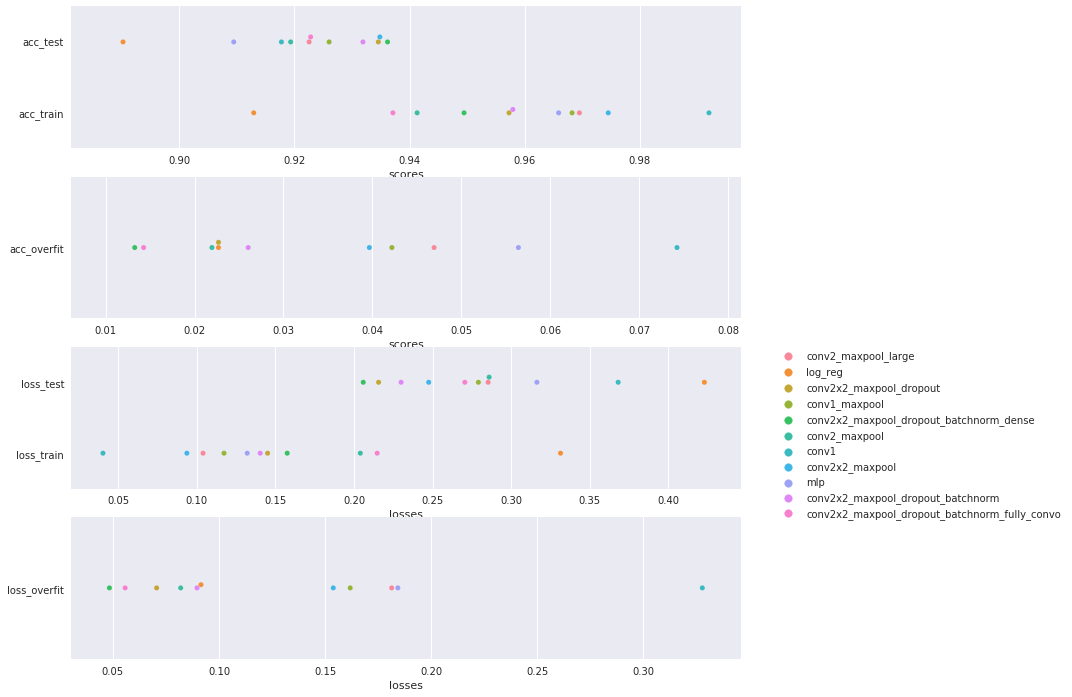

In [8]:
plot_grid(save='../resources/model_grid_scores.csv');

In [ ]:
from grid_plot import train_models_and_format_grid
grid = train_models_and_format_grid(X_train, Y_train, X_test, Y_test, plot_losses, epochs=1)
grid.to_csv('../resources/example_grid.csv', index=None)
grid

In [ ]:
plot_complexity(save='../resources/example_grid.csv');

In [ ]:
plot_grid(save='../resources/example_grid.csv');